# Лабораторная работа №4. Линейные модели, SVM и деревья решений.
## Задание
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
    - одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
    - SVM;
    - дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

In [19]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error, r2_score 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [20]:
# 1.Формирование обучающей и тестовой выборки
diab = load_diabetes()

diab_df = pd.DataFrame(data = np.c_[diab['data'], diab['target']],
                        columns = diab['feature_names'] + ['target'])

diab_df.isnull().any().any()

False

In [21]:
diab_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [22]:
diab_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [23]:
diab_X_train, diab_X_test, diab_y_train, diab_y_test = train_test_split(
    diab.data, diab.target, test_size=0.2, random_state=1)

In [24]:
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold


cv = RepeatedKFold(n_splits= 10 , n_repeats= 3 , random_state=1)

#define model
model=LassoCV(alphas= arange(0, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
model.fit(diab_X_train, diab_y_train)

#display lambda that produced the lowest test MSE
print(model.alpha_)

0.05


/home/bogdan/.virtualenvs/data-analyse/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/bogdan/.virtualenvs/data-analyse/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439853.7781675919, tolerance: 188.16996466876972
  model = cd_fast.enet_coordinate_descent_gram(
/home/bogdan/.virtualenvs/data-analyse/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/bogdan/.virtualenvs/data-analyse

In [25]:
# 2. Обучение линейной модели
reg = Lasso(alpha=0.05)
res = reg.fit(diab_X_train, diab_y_train)
print(res.coef_, res.intercept_)

[-2.91107707e-01 -2.30048631e+02  5.28896925e+02  2.94100889e+02
 -7.53049586e+01 -0.00000000e+00 -2.67478689e+02  0.00000000e+00
  4.86195668e+02  4.61737910e+01] 151.46786141711533


In [26]:
# Оценка качества модели
r2_score(diab_y_test, res.predict(diab_X_test)), mean_absolute_error(diab_y_test, res.predict(diab_X_test))

(0.4324822518580075, 42.34106532145953)

In [27]:
# 3. Обучение SVM (SVR)
# Масштабирование данных
sc = MinMaxScaler()
sc_data = sc.fit_transform(diab.data)
sc_data[0]

array([0.66666667, 1.        , 0.58264463, 0.54929577, 0.29411765,
       0.25697211, 0.20779221, 0.28208745, 0.562217  , 0.43939394])

In [28]:
# Разделение на тестовую и обучающие выборки
diab_X_train1, diab_X_test1, diab_y_train1, diab_y_test1 = train_test_split(
    sc_data, diab.target, test_size=0.5, random_state=1)

# Обучение SVR
svr = SVR(kernel='poly')
svr.fit(diab_X_train1, diab_y_train1)

SVR(kernel='poly')

In [29]:
# Оценка качества модели
r2_score(diab_y_test1, svr.predict(diab_X_test1)), mean_absolute_error(diab_y_test1, svr.predict(diab_X_test1))

(0.4092880494475172, 45.28288000789277)

In [30]:
# 4. Обучение дерева решений
dtr = DecisionTreeRegressor(max_depth=5, criterion='poisson')
dtr.fit(diab_X_train, diab_y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5)

In [31]:
# Оценка качества модели
r2_score(diab_y_test, dtr.predict(diab_X_test)), mean_absolute_error(diab_y_test, dtr.predict(diab_X_test))

(0.1902943618139994, 48.27785877271787)

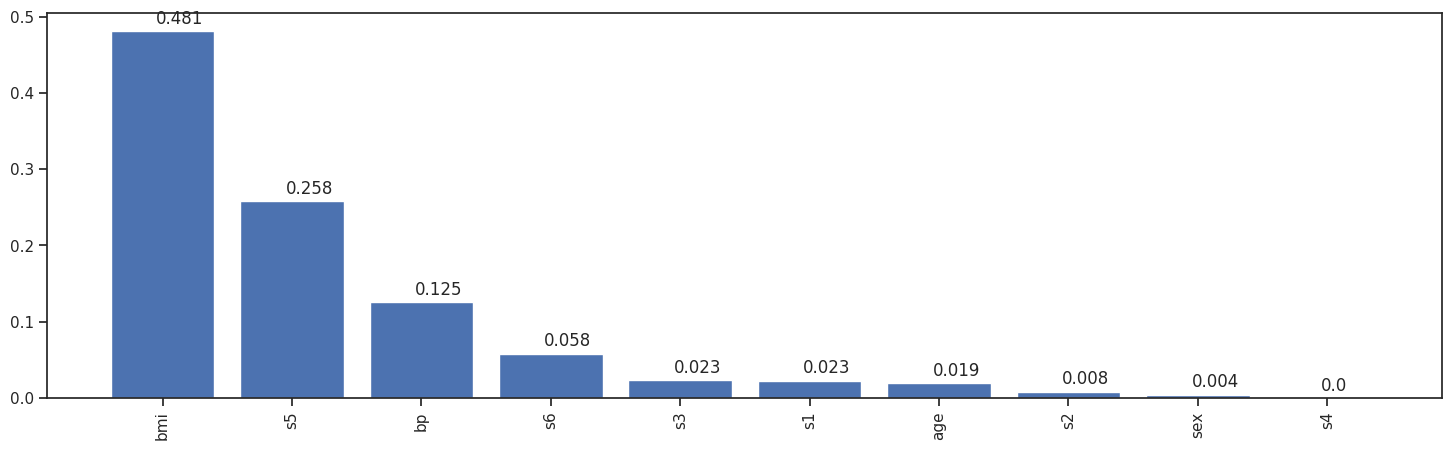

(['bmi', 's5', 'bp', 's6', 's3', 's1', 'age', 's2', 'sex', 's4'],
 [0.4807765414135354,
  0.25826645273818605,
  0.12532115447268796,
  0.05818357124190094,
  0.022857075507692653,
  0.02280333226666652,
  0.019280558477116443,
  0.008293358589476954,
  0.004210213559097358,
  7.74173363977748e-06])

In [32]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

draw_feature_importances(dtr, diab_df)

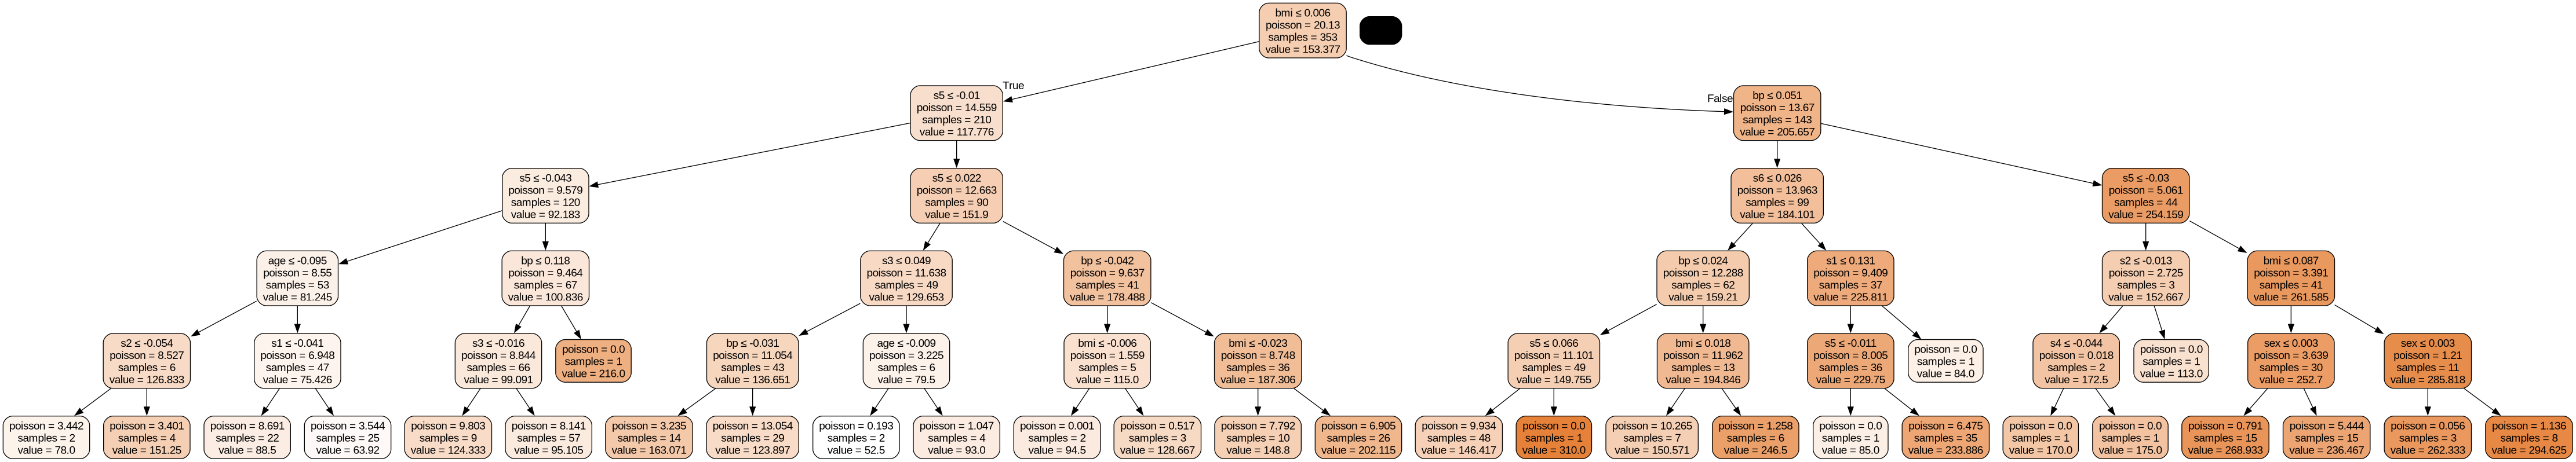

In [34]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus

def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

Image(get_png_tree(dtr, diab_df[diab['feature_names']].columns), height='70%')